In [11]:
%matplotlib inline

import numpy as np
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy import integrate
from matplotlib import pyplot as plt

#Generar muestras de P*(x) = 10*x*(1-x)

#burn in period, samle window
def metropolis(p,sigma, b_step, s_window,n):
    #Generar x0 , P*(x_0)>0

    x_t = np.random.uniform(0,1)
 
    #Normalizar P
    samples = []
    samples2 = []
    for i in range(0,n):
        x_star = np.random.normal(x_t, sigma, 1)
        alpha = min(p(x_star)/p(x_t),1)
        flip = np.random.uniform(0,1)
        
        #Acceptance condition
        if(alpha >= flip):
            samples.append(x_star)
            x_t = x_star
        else:
            samples.append(x_t)
            x_t = x_t #No cambia...
    
    #Burn in step
    #print(samples)
    samples = samples[b_step:]
    #print(samples)
    #Sampling window
    #Usar slicing!
    for i in range(0,len(samples),s_window):
        samples2.append(samples[i][0])
    return samples2



(array([ 0.14210526,  0.40526316,  0.71578947,  0.83684211,  1.        ,
         1.05789474,  1.27368421,  1.35789474,  1.34210526,  1.67368421,
         1.5       ,  1.53157895,  1.47368421,  1.34210526,  1.2       ,
         1.08947368,  0.85789474,  0.65263158,  0.43684211,  0.11052632]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

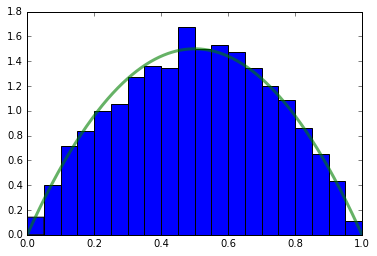

In [13]:
sigma = 0.7
p = lambda x: 10*x*(1-x)
b_step = 100000
s_window = 500
n = 2000000
p_integral = integrate.quad(p,0,1)[0]
m_samples = sorted(metropolis(p,sigma,b_step,s_window,n))
#samples_final = []
#for i in m_samples:
#    samples_final.append(i[0])
x = np.linspace(0,1, 1000)
plt.plot(x, p(x)/p_integral,'g-', lw=3, alpha=0.6, label='gamma pdf')

plt.hist(m_samples,bins=np.arange(0,1.05,0.05), normed=True)

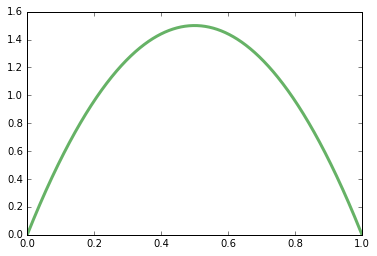

In [30]:
plt.plot(x, p(x)/p_integral,'g-', lw=3, alpha=0.6, label='gamma pdf')